In [1]:
import numpy as np
import matplotlib.pyplot as plt

# (s, Q)

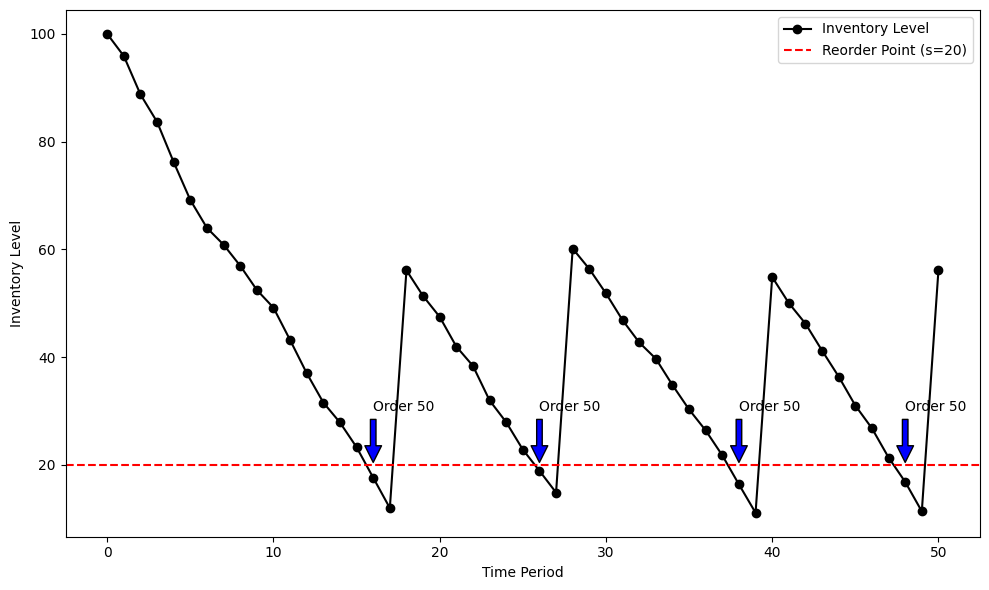

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the (s, Q) model
initial_inventory = 100   # Starting inventory
reorder_point = 20        # Reorder point (s)
order_quantity = 50       # Order quantity (Q)
demand_rate = 5           # Average demand per period
lead_time = 2             # Time delay in receiving orders
time_periods = 50         # Number of time periods to simulate

# Variables to track inventory over time
inventory_levels = [initial_inventory]
orders = []
outstanding_order = 0
order_arrival_time = -1

# Simulate the inventory system
for period in range(1, time_periods + 1):
    # Generate random demand for the period (using Poisson distribution)
    demand = np.random.normal(demand_rate)
    
    # Reduce inventory by demand
    current_inventory = inventory_levels[-1] - demand
    
    # Check if order is due to arrive
    if period == order_arrival_time:
        current_inventory += outstanding_order
        outstanding_order = 0
        order_arrival_time = -1  # Reset
    
    # Place order if inventory falls below reorder point
    if current_inventory <= reorder_point and outstanding_order == 0:
        outstanding_order = order_quantity
        order_arrival_time = period + lead_time  # Order arrives after lead time
        orders.append((period, order_quantity))
    
    # Append current inventory level
    inventory_levels.append(current_inventory)

# Plot the inventory levels over time
plt.figure(figsize=(10, 6))
plt.plot(inventory_levels, label='Inventory Level', marker='o', color='black')
plt.axhline(reorder_point, color='red', linestyle='--', label=f'Reorder Point (s={reorder_point})')

# Mark the periods when orders were placed
for order in orders:
    plt.annotate(f'Order {order[1]}', xy=(order[0], reorder_point), xytext=(order[0], reorder_point + 10),
                 arrowprops=dict(facecolor='blue', shrink=0.05))

# plt.title('(s, Q) Inventory Model Simulation')
plt.xlabel('Time Period')
plt.ylabel('Inventory Level')
plt.legend()
# plt.grid(True)
plt.tight_layout()

plt.savefig('../content/vis/s_Q.png', dpi=300)

plt.show()


# (R, s, S)

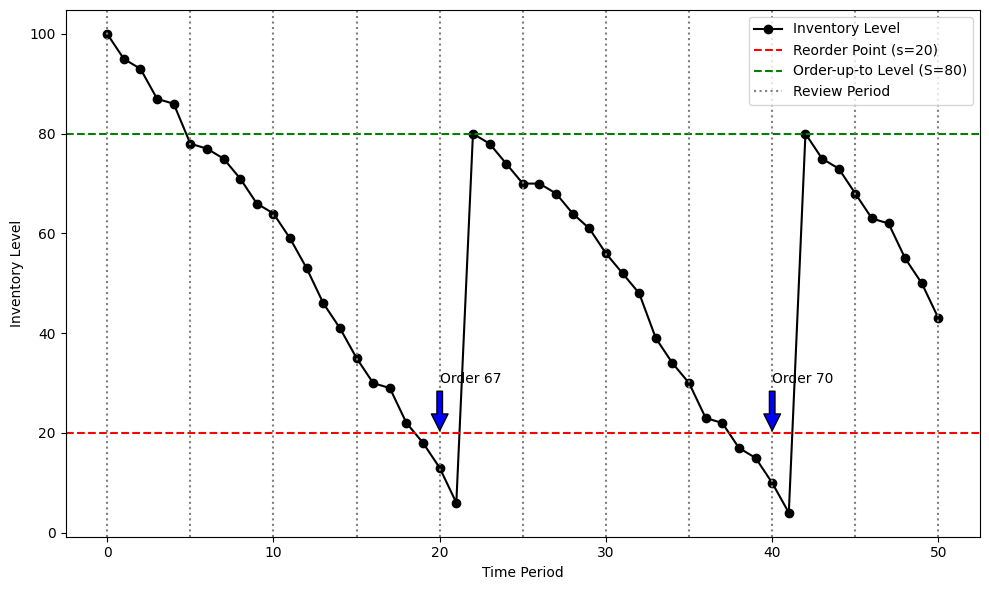

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the (R, s, S) model
initial_inventory = 100   # Starting inventory level
reorder_point = 20        # Reorder point (s)
order_up_to_level = 80    # Order-up-to level (S)
review_period = 5         # Review period (R)
demand_rate = 5           # Average demand per period
lead_time = 2             # Time delay for receiving orders
time_periods = 50         # Number of time periods to simulate

# Variables to track inventory over time
inventory_levels = [initial_inventory]
orders = []
outstanding_order = 0
order_arrival_time = -1

# Simulate the inventory system
for period in range(1, time_periods + 1):
    # Generate random demand for the period (using Poisson distribution)
    demand = np.random.poisson(demand_rate)
    
    # Reduce inventory by demand
    current_inventory = inventory_levels[-1] - demand
    
    # Check if order is due to arrive
    if period == order_arrival_time:
        current_inventory = order_up_to_level  # Set inventory to S after order arrives
        outstanding_order = 0
        order_arrival_time = -1  # Reset
    
    # Review inventory only at periods that are multiples of the review period R
    if period % review_period == 0:
        if current_inventory <= reorder_point and outstanding_order == 0:
            # Order enough to bring inventory up to the order-up-to level S
            order_quantity = order_up_to_level - current_inventory
            outstanding_order = order_quantity
            order_arrival_time = period + lead_time  # Order arrives after lead time
            orders.append((period, order_quantity))
    
    # Append current inventory level
    inventory_levels.append(current_inventory)

# Plot the inventory levels over time
plt.figure(figsize=(10, 6))
plt.plot(inventory_levels, label='Inventory Level', marker='o', color='black')
plt.axhline(reorder_point, color='red', linestyle='--', label=f'Reorder Point (s={reorder_point})')
plt.axhline(order_up_to_level, color='green', linestyle='--', label=f'Order-up-to Level (S={order_up_to_level})')

# Mark the review periods with vertical lines
for period in range(0, time_periods + 1, review_period):
    plt.axvline(x=period, color='grey', linestyle=':', label='Review Period' if period == 0 else "")

# Mark the periods when orders were placed
for order in orders:
    plt.annotate(f'Order {order[1]}', xy=(order[0], reorder_point), xytext=(order[0], reorder_point + 10),
                 arrowprops=dict(facecolor='blue', shrink=0.05))

# plt.title('(R, s, S) Inventory Model Simulation')
plt.xlabel('Time Period')
plt.ylabel('Inventory Level')
plt.legend()
# plt.grid(True)
plt.tight_layout()

plt.savefig('../content/vis/R_s_S.png', dpi=300)

plt.show()


# (s, S)

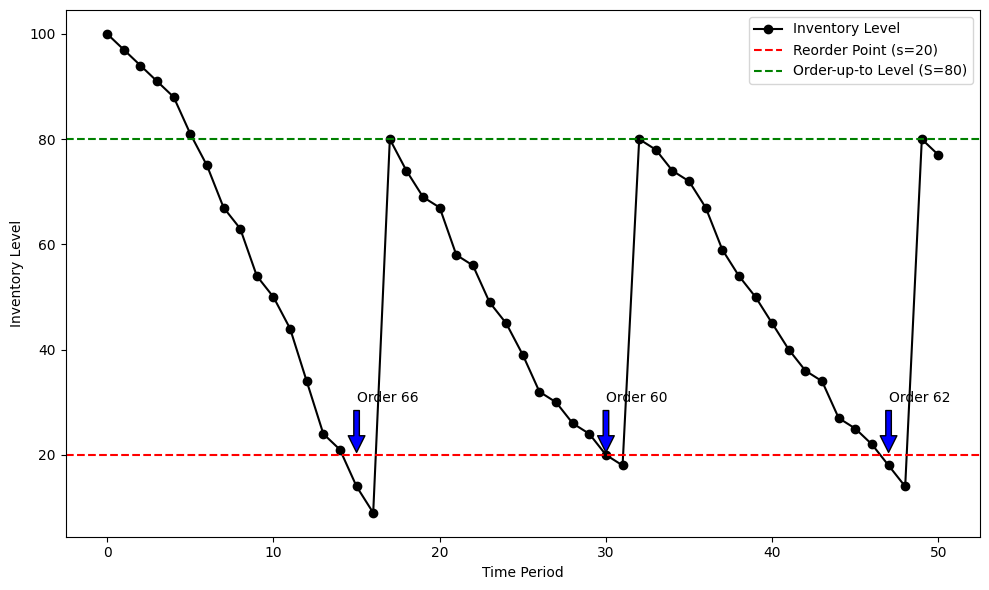

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the (s, S) model
initial_inventory = 100   # Starting inventory
reorder_point = 20        # Reorder point (s)
order_up_to_level = 80    # Order-up-to level (S)
demand_rate = 5           # Average demand per period
lead_time = 2             # Time delay for receiving orders
time_periods = 50         # Number of time periods to simulate

# Variables to track inventory over time
inventory_levels = [initial_inventory]
orders = []
outstanding_order = 0
order_arrival_time = -1

# Simulate the inventory system
for period in range(1, time_periods + 1):
    # Generate random demand for the period (using Poisson distribution)
    demand = np.random.poisson(demand_rate)
    
    # Reduce inventory by demand
    current_inventory = inventory_levels[-1] - demand
    
    # Check if order is due to arrive
    if period == order_arrival_time:
        current_inventory = order_up_to_level  # Set inventory to S after order arrives
        outstanding_order = 0
        order_arrival_time = -1  # Reset
    
    # Review inventory only at periods that are multiples of the review period R
    # if period % review_period == 0:
    if current_inventory <= reorder_point and outstanding_order == 0:
        # Order enough to bring inventory up to the order-up-to level S
        order_quantity = order_up_to_level - current_inventory
        outstanding_order = order_quantity
        order_arrival_time = period + lead_time  # Order arrives after lead time
        orders.append((period, order_quantity))
    
    # Append current inventory level
    inventory_levels.append(current_inventory)

# Plot the inventory levels over time
plt.figure(figsize=(10, 6))
plt.plot(inventory_levels, label='Inventory Level', marker='o', color='black')
plt.axhline(reorder_point, color='red', linestyle='--', label=f'Reorder Point (s={reorder_point})')
plt.axhline(order_up_to_level, color='green', linestyle='--', label=f'Order-up-to Level (S={order_up_to_level})')

# Mark the periods when orders were placed
for order in orders:
    plt.annotate(f'Order {order[1]}', xy=(order[0], reorder_point), xytext=(order[0], reorder_point + 10),
                 arrowprops=dict(facecolor='blue', shrink=0.05))

# plt.title('(s, S) Inventory Model Simulation')
plt.xlabel('Time Period')
plt.ylabel('Inventory Level')
plt.legend()
# plt.grid(True)
plt.tight_layout()

plt.savefig('../content/vis/s_S.png', dpi=300)

plt.show()


# (R, s, Q)

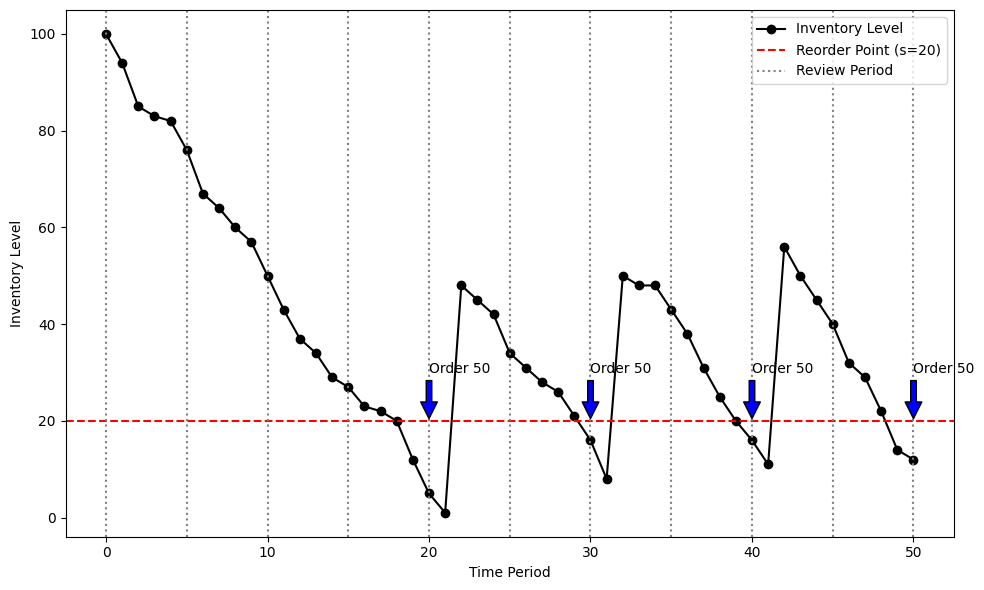

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the (R, s, Q) model
initial_inventory = 100   # Starting inventory level
reorder_point = 20        # Reorder point (s)
order_quantity = 50       # Order quantity (Q)
review_period = 5         # Review period (R)
demand_rate = 5           # Average demand per period
lead_time = 2             # Time delay for receiving orders
time_periods = 50         # Number of time periods to simulate

# Variables to track inventory over time
inventory_levels = [initial_inventory]
orders = []
outstanding_order = 0
order_arrival_time = -1

# Simulate the inventory system
for period in range(1, time_periods + 1):
    # Generate random demand for the period (using Poisson distribution)
    demand = np.random.poisson(demand_rate)
    
    # Reduce inventory by demand
    current_inventory = inventory_levels[-1] - demand
    
    # Check if order is due to arrive
    if period == order_arrival_time:
        current_inventory += outstanding_order
        outstanding_order = 0
        order_arrival_time = -1  # Reset
    
    # Review inventory only at periods that are multiples of the review period R
    if period % review_period == 0:
        if current_inventory <= reorder_point and outstanding_order == 0:
            # Place an order of fixed quantity Q
            outstanding_order = order_quantity
            order_arrival_time = period + lead_time  # Order arrives after lead time
            orders.append((period, order_quantity))
    
    # Append current inventory level
    inventory_levels.append(current_inventory)

# Plot the inventory levels over time
plt.figure(figsize=(10, 6))
plt.plot(inventory_levels, label='Inventory Level', marker='o', color='black')
plt.axhline(reorder_point, color='red', linestyle='--', label=f'Reorder Point (s={reorder_point})')

for period in range(0, time_periods + 1, review_period):
    plt.axvline(x=period, color='grey', linestyle=':', label='Review Period' if period == 0 else "")


# Mark the periods when orders were placed
for order in orders:
    plt.annotate(f'Order {order[1]}', xy=(order[0], reorder_point), xytext=(order[0], reorder_point + 10),
                 arrowprops=dict(facecolor='blue', shrink=0.05))

# plt.title('(R, s, Q) Inventory Model Simulation')
plt.xlabel('Time Period')
plt.ylabel('Inventory Level')
plt.legend()
# plt.grid(True)
plt.tight_layout()

plt.savefig('../content/vis/R_s_Q.png', dpi=300)

plt.show()

# NewsVendor

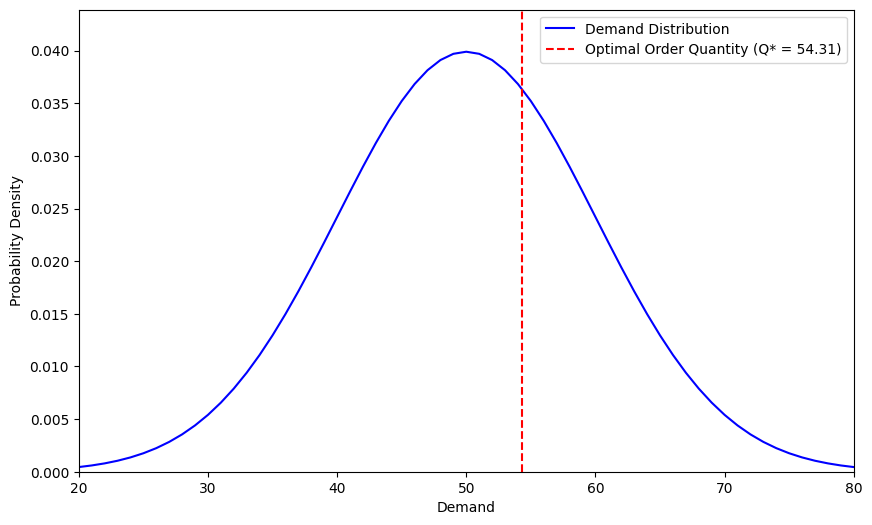

np.float64(54.30727299295457)

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parameters for the newsvendor example
selling_price = 3  # Selling price per newspaper
purchase_cost = 1   # Purchase cost per newspaper
unsold_value = 0    # Value of unsold newspapers

# Calculate underage and overage costs
C_u = selling_price - purchase_cost  # Underage cost
C_o = purchase_cost - unsold_value    # Overage cost

# Calculate the critical ratio
CR = C_u / (C_u + C_o)

# Assume a normal distribution for demand
mu = 50    # Mean demand
sigma = 10 # Standard deviation of demand

# Calculate the optimal order quantity (Q*)
z_star = stats.norm.ppf(CR)  # z-score corresponding to the critical ratio
Q_star = mu + z_star * sigma  # Optimal order quantity

# Create a range of demand values for visualization
demand_range = np.arange(20, 81, 1)
demand_distribution = stats.norm.pdf(demand_range, mu, sigma)

# Plotting the demand distribution and the optimal order quantity
plt.figure(figsize=(10, 6))
plt.plot(demand_range, demand_distribution, label='Demand Distribution', color='blue')
plt.axvline(Q_star, color='red', linestyle='--', label=f'Optimal Order Quantity (Q* = {Q_star:.2f})')
# plt.title('Newsvendor Model: Demand Distribution and Optimal Order Quantity')
plt.xlabel('Demand')
plt.ylabel('Probability Density')
plt.legend()
# plt.grid()
plt.xlim(20, 80)
plt.ylim(0, max(demand_distribution) * 1.1)
plt.show()

Q_star
